# Clustering

## Cónfiguraciones


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
train_data = pd.read_csv('train.csv')

## a. Agrupación por calidad y tamaño

C:\Users\villa\AppData\Local\Temp\ipykernel_15872\2635310387.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quality_size_analysis = train_data.groupby(['QualityGroup', 'SizeGroup'])['SalePrice'].agg(['mean', 'count', 'std'])


Precio promedio, conteo y desviación estándar por grupo de calidad y tamaño:
                                 mean  count            std
QualityGroup SizeGroup                                     
Baja         Pequeña     75146.952381     21   24965.179602
             Mediana    106750.000000      4   23739.348489
             Grande               NaN      0            NaN
Media        Pequeña    130751.326433    628   29214.399748
             Mediana    167337.726531    245   36419.656265
             Grande     208251.714286     14   38975.661375
Alta         Pequeña    188635.867647    136   36169.199210
             Mediana    253748.306180    356   69440.955674
             Grande     359390.803571     56  124577.318821


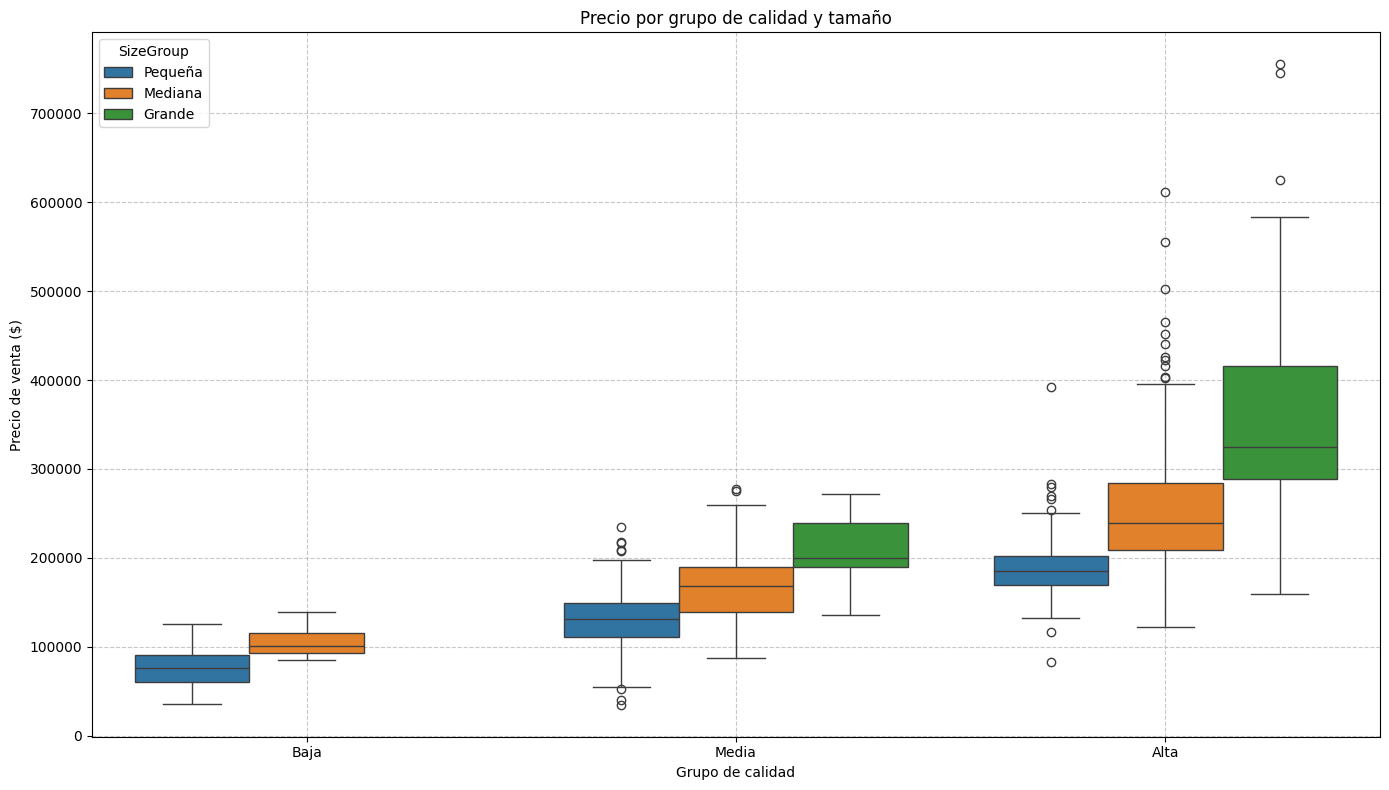

C:\Users\villa\AppData\Local\Temp\ipykernel_15872\2635310387.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = train_data.groupby(['QualityGroup', 'SizeGroup'])['SalePrice'].mean().reset_index()


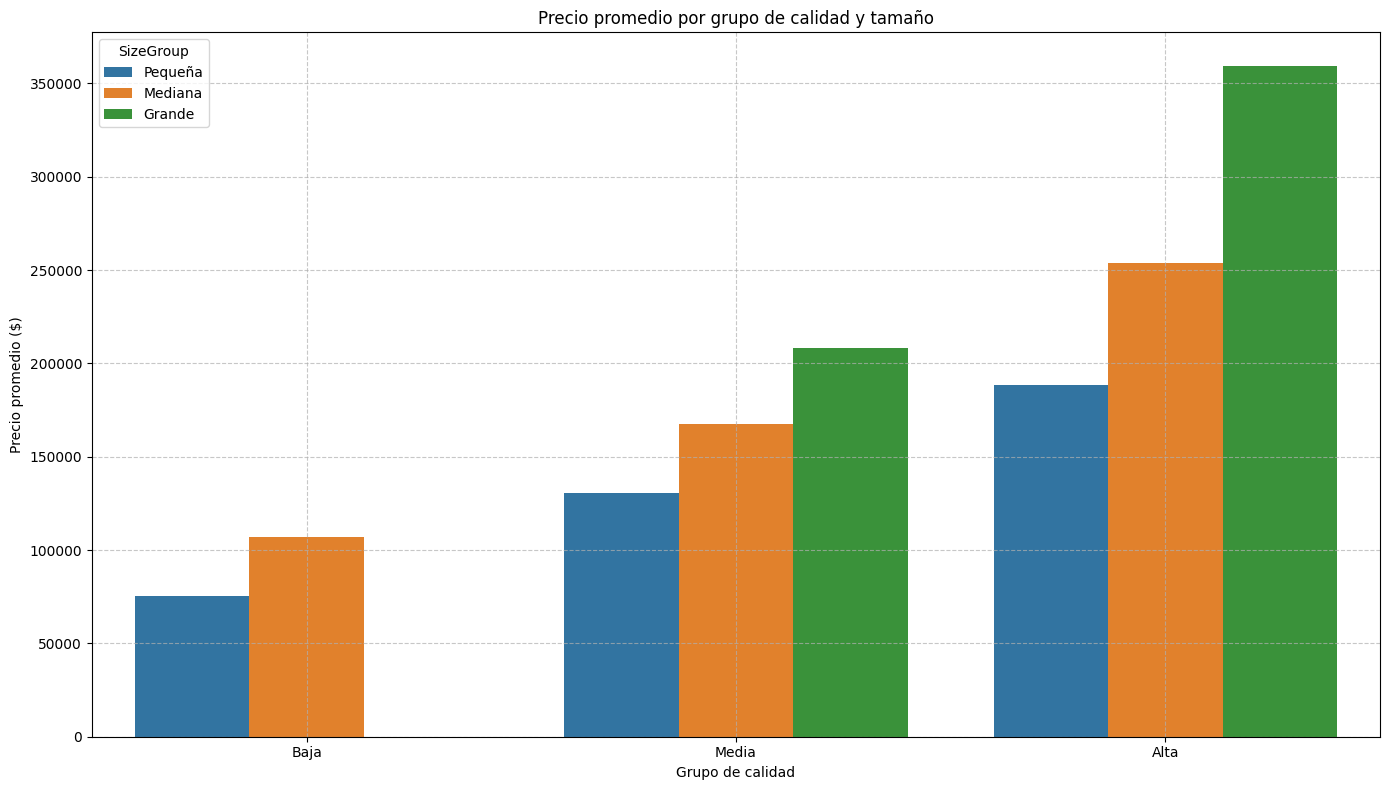

In [2]:
# Crear categorías de calidad
train_data['QualityGroup'] = pd.cut(
    train_data['OverallQual'],
    bins=[0, 3, 6, 10],
    labels=['Baja', 'Media', 'Alta']
)

# Crear categorías de tamaño
train_data['SizeGroup'] = pd.cut(
    train_data['GrLivArea'],
    bins=[0, 1500, 2500, float('inf')],
    labels=['Pequeña', 'Mediana', 'Grande']
)

# Análisis cruzado: calcular el precio promedio y conteo por grupo
quality_size_analysis = train_data.groupby(['QualityGroup', 'SizeGroup'])['SalePrice'].agg(['mean', 'count', 'std'])

# Mostrar el resultado
print("Precio promedio, conteo y desviación estándar por grupo de calidad y tamaño:")
print(quality_size_analysis)

# Visualización con boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='QualityGroup', y='SalePrice', hue='SizeGroup', data=train_data)
plt.title('Precio por grupo de calidad y tamaño')
plt.xlabel('Grupo de calidad')
plt.ylabel('Precio de venta ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualización con barplot para el precio promedio
plt.figure(figsize=(14, 8))
# Preparar datos para el gráfico
grouped_data = train_data.groupby(['QualityGroup', 'SizeGroup'])['SalePrice'].mean().reset_index()
sns.barplot(x='QualityGroup', y='SalePrice', hue='SizeGroup', data=grouped_data)
plt.title('Precio promedio por grupo de calidad y tamaño')
plt.xlabel('Grupo de calidad')
plt.ylabel('Precio promedio ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## b. Agrupación por época/antigüedad

Análisis por época y estado de remodelación:
                                                   mean  count           std
AgeGroup                   Remodeled                                        
Históricas (pre-1950)      No Remodelada  111258.333333     12  18620.148341
                           Remodelada     132782.797546    326  54184.157316
Clásicas (1950-1980)       No Remodelada  143765.361478    379  37797.811988
                           Remodelada     168740.418440    141  48479.299489
Modernas (1980-2000)       No Remodelada  211783.788732    142  68559.939971
                           Remodelada     230853.020833     96  98354.214060
Contemporáneas (post-2000) No Remodelada  232027.904762    231  73717.029292
                           Remodelada     266237.210526    133  97132.006588


C:\Users\villa\AppData\Local\Temp\ipykernel_15872\3168127477.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_remodel_analysis = train_data.groupby(['AgeGroup', 'Remodeled'])['SalePrice'].agg(['mean', 'count', 'std'])


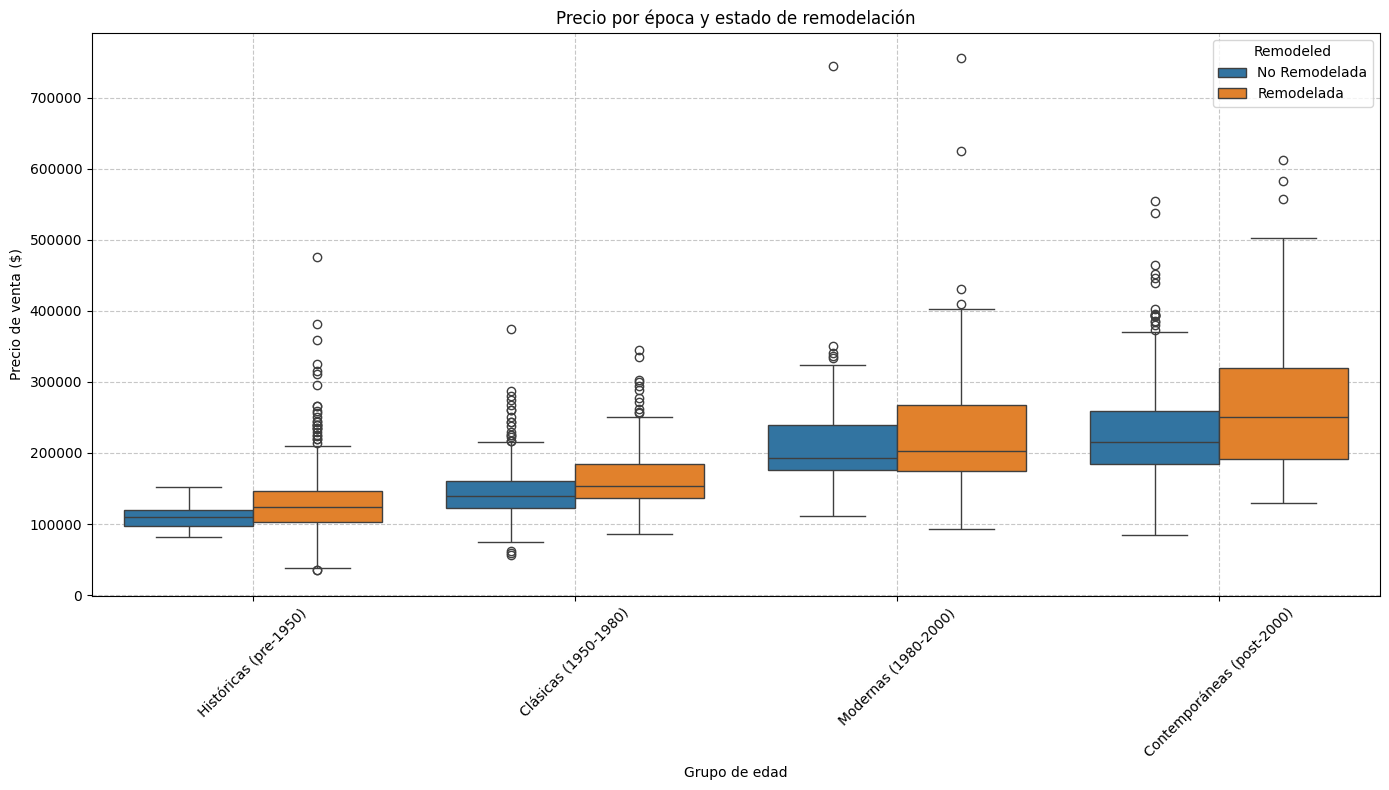

C:\Users\villa\AppData\Local\Temp\ipykernel_15872\3168127477.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = train_data.groupby(['AgeGroup', 'Remodeled'])['SalePrice'].mean().reset_index()


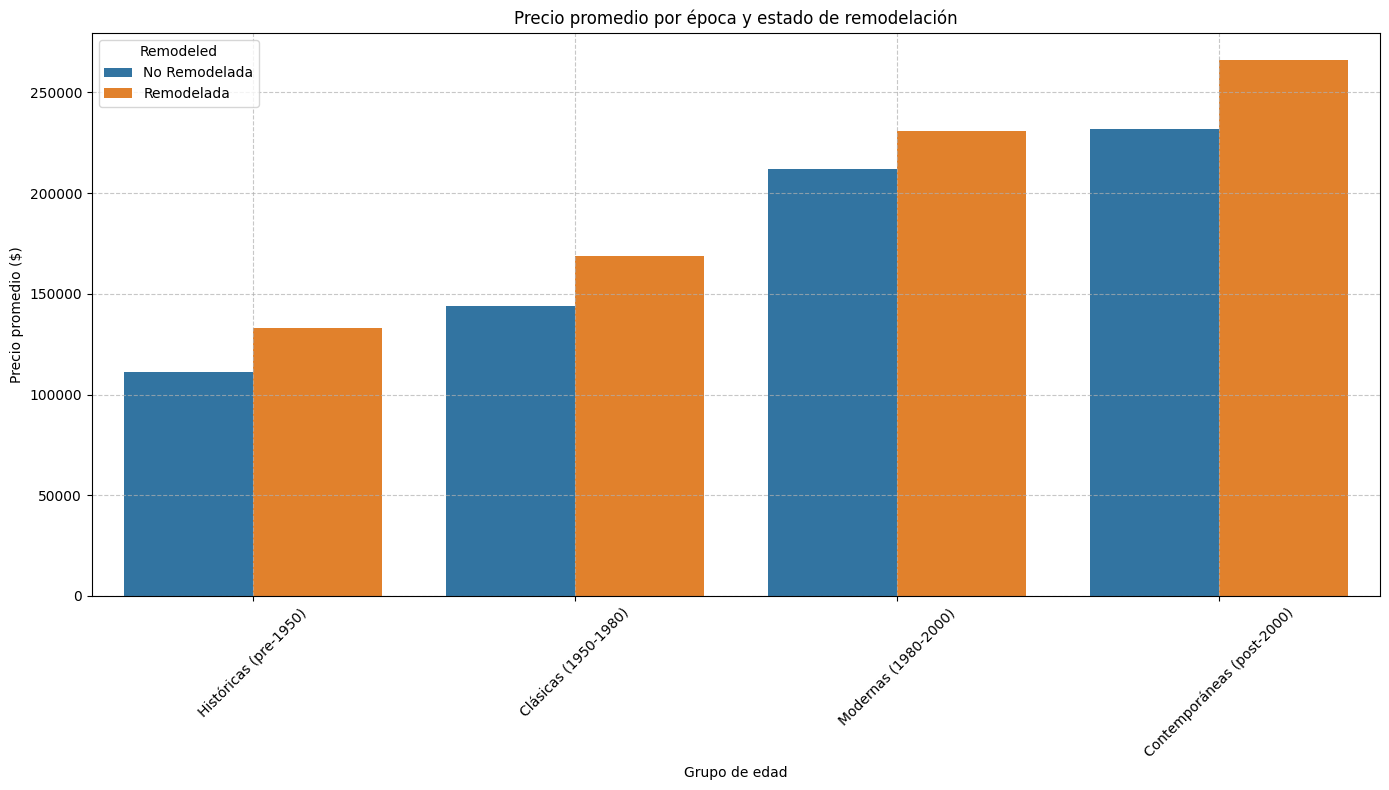


Porcentaje de casas remodeladas por grupo de edad:
                     AgeGroup  Porcentaje Remodelado
0       Históricas (pre-1950)              96.449704
1        Clásicas (1950-1980)              27.115385
2        Modernas (1980-2000)              40.336134
3  Contemporáneas (post-2000)              36.538462


C:\Users\villa\AppData\Local\Temp\ipykernel_15872\3168127477.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  remodel_pct = train_data.groupby('AgeGroup')['Remodeled'].apply(


In [3]:
# Crear grupos por época/antigüedad
train_data['AgeGroup'] = pd.cut(
   train_data['YearBuilt'],
   bins=[0, 1950, 1980, 2000, float('inf')],
   labels=['Históricas (pre-1950)', 'Clásicas (1950-1980)', 
           'Modernas (1980-2000)', 'Contemporáneas (post-2000)']
)

# Identificar si la casa ha sido remodelada o no
train_data['Remodeled'] = (train_data['YearRemodAdd'] > train_data['YearBuilt']).map({True: 'Remodelada', False: 'No Remodelada'})

# Análisis por grupo de edad y estado de remodelación
age_remodel_analysis = train_data.groupby(['AgeGroup', 'Remodeled'])['SalePrice'].agg(['mean', 'count', 'std'])

# Mostrar el resultado
print("Análisis por época y estado de remodelación:")
print(age_remodel_analysis)

# Visualización con boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='AgeGroup', y='SalePrice', hue='Remodeled', data=train_data)
plt.title('Precio por época y estado de remodelación')
plt.xlabel('Grupo de edad')
plt.ylabel('Precio de venta ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de barras para el precio promedio
plt.figure(figsize=(14, 8))
grouped_data = train_data.groupby(['AgeGroup', 'Remodeled'])['SalePrice'].mean().reset_index()
sns.barplot(x='AgeGroup', y='SalePrice', hue='Remodeled', data=grouped_data)
plt.title('Precio promedio por época y estado de remodelación')
plt.xlabel('Grupo de edad')
plt.ylabel('Precio promedio ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular el porcentaje de casas remodeladas por grupo de edad
remodel_pct = train_data.groupby('AgeGroup')['Remodeled'].apply(
   lambda x: (x == 'Remodelada').mean() * 100
).reset_index(name='Porcentaje Remodelado')

print("\nPorcentaje de casas remodeladas por grupo de edad:")
print(remodel_pct)

## c. Agrupación por tipología/estilo

Análisis por tipología/estilo:
                                mean  count           std    median
Typology                                                           
Unifamiliar un piso    168189.019557    767  76390.518126  144900.0
Unifamiliar dos pisos  226213.192000    375  87631.539021  205000.0
Dúplex/Multifamiliar   156304.587500    240  54394.802994  145000.0
Otros                  164114.358974     78  35609.436827  159975.0


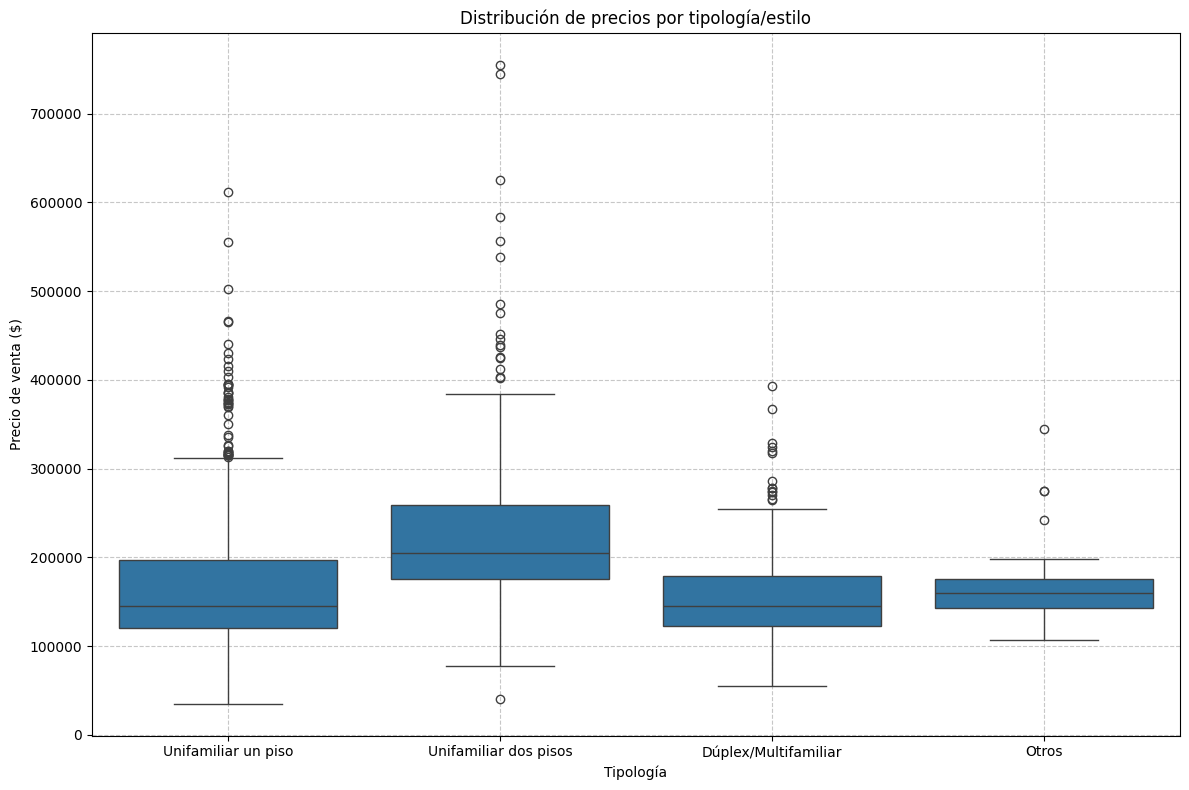

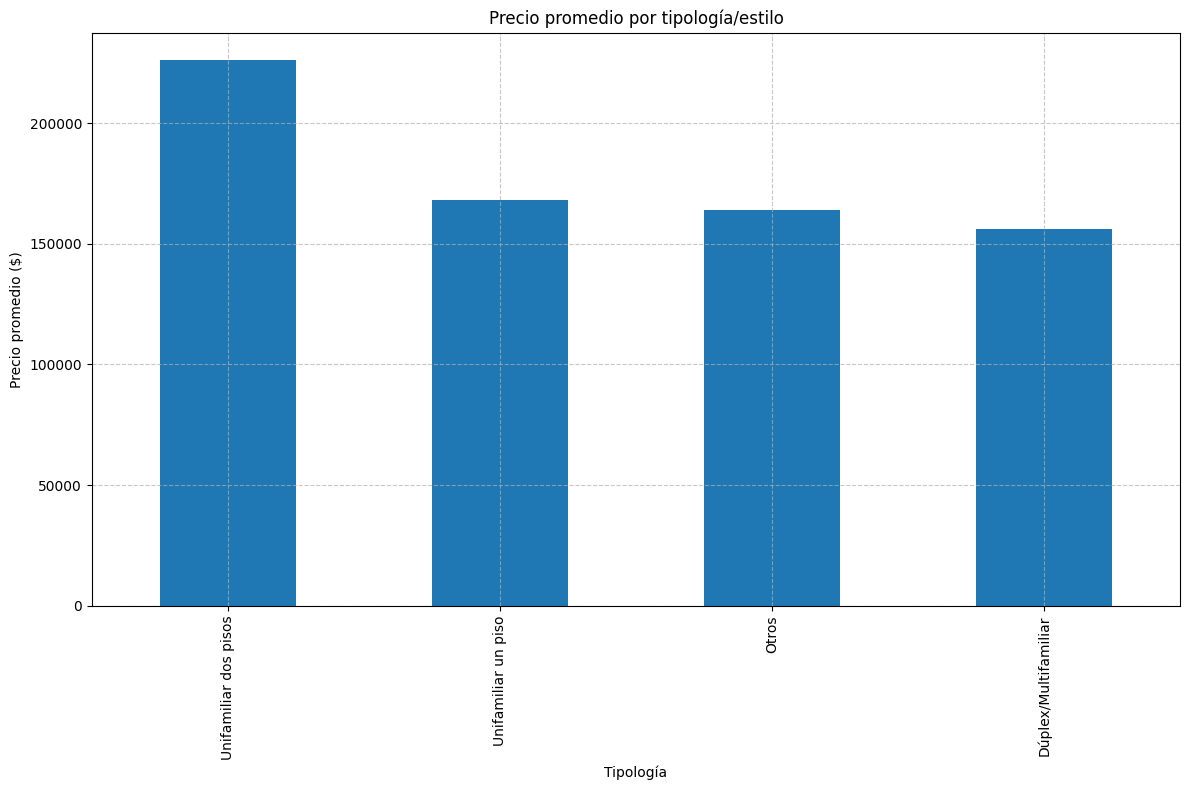

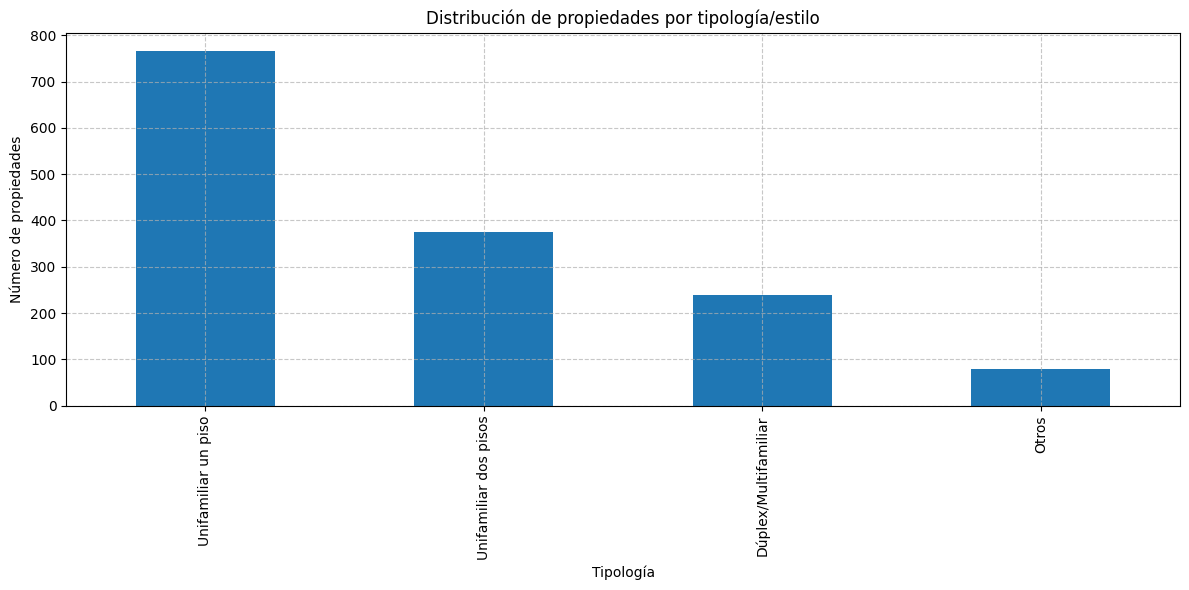

In [ ]:
# Función para asignar tipología/estilo basada en múltiples variables
def assign_typology(row):
   # Viviendas unifamiliares de un piso
   if row['BldgType'] == '1Fam' and (row['HouseStyle'] in ['1Story', '1.5Fin', '1.5Unf'] or row['MSSubClass'] in [20, 30, 40, 45, 50, 120]):
       return 'Unifamiliar un piso'
   
   # Viviendas unifamiliares de dos pisos
   elif row['BldgType'] == '1Fam' and (row['HouseStyle'] in ['2Story', '2.5Fin', '2.5Unf'] or row['MSSubClass'] in [60, 70, 75, 160]):
       return 'Unifamiliar dos pisos'
   
   # Dúplex y propiedades multifamiliares
   elif row['BldgType'] in ['Duplx', '2fmCon', 'Twnhs', 'TwnhsE'] or row['MSSubClass'] in [90, 190]:
       return 'Dúplex/Multifamiliar'
   
   # PUD (Planned Unit Development)
   elif row['MSSubClass'] in [120, 150, 160, 180] or 'PUD' in str(row['BldgType']):
       return 'PUD'
   
   # Otros casos
   else:
       return 'Otros'

# Crear la nueva columna de tipología
train_data['Typology'] = train_data.apply(assign_typology, axis=1)

# Análisis por tipología
typology_analysis = train_data.groupby('Typology')['SalePrice'].agg(['mean', 'count', 'std', 'median']).sort_values(by='count', ascending=False)

# Mostrar el resultado
print("Análisis por tipología/estilo:")
print(typology_analysis)

# Visualización con boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Typology', y='SalePrice', data=train_data, order=typology_analysis.index)
plt.title('Distribución de precios por tipología/estilo')
plt.xlabel('Tipología')
plt.ylabel('Precio de venta ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de barras para el precio promedio
plt.figure(figsize=(12, 8))
typology_means = train_data.groupby('Typology')['SalePrice'].mean().sort_values(ascending=False)
typology_means.plot(kind='bar')
plt.title('Precio promedio por tipología/estilo')
plt.xlabel('Tipología')
plt.ylabel('Precio promedio ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribución de la tipología
plt.figure(figsize=(12, 6))
typology_counts = train_data['Typology'].value_counts()
typology_counts.plot(kind='bar')
plt.title('Distribución de propiedades por tipología/estilo')
plt.xlabel('Tipología')
plt.ylabel('Número de propiedades')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## d. Agrupación por ubicación

Análisis por ubicación (valor de barrio + zonificación):
                                                       mean  count  \
NeighborhoodValue ZoningSimple                                       
Alta valoración   Residencial media densidad  277375.000000      4   
                  Residencial baja densidad   274336.604895    286   
                  Residencial tipo village    214014.061538     65   
Baja valoración   Residencial baja densidad   163452.578035    865   
Alta valoración   Residencial alta densidad   145000.000000      2   
Baja valoración   Residencial alta densidad   129638.142857     14   
                  Residencial media densidad  123493.313084    214   
                  Comercial                    74528.000000     10   

                                                       std  
NeighborhoodValue ZoningSimple                              
Alta valoración   Residencial media densidad  81665.348629  
                  Residencial baja densidad   99321.852022 

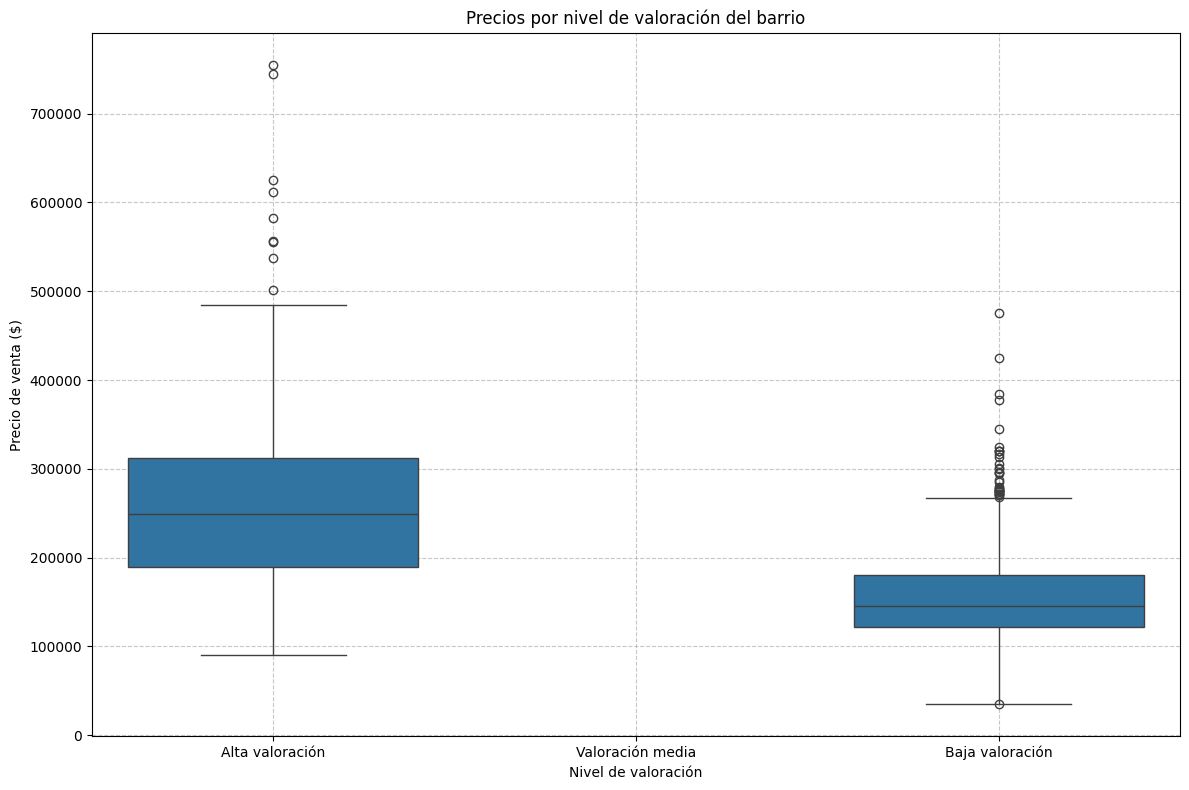

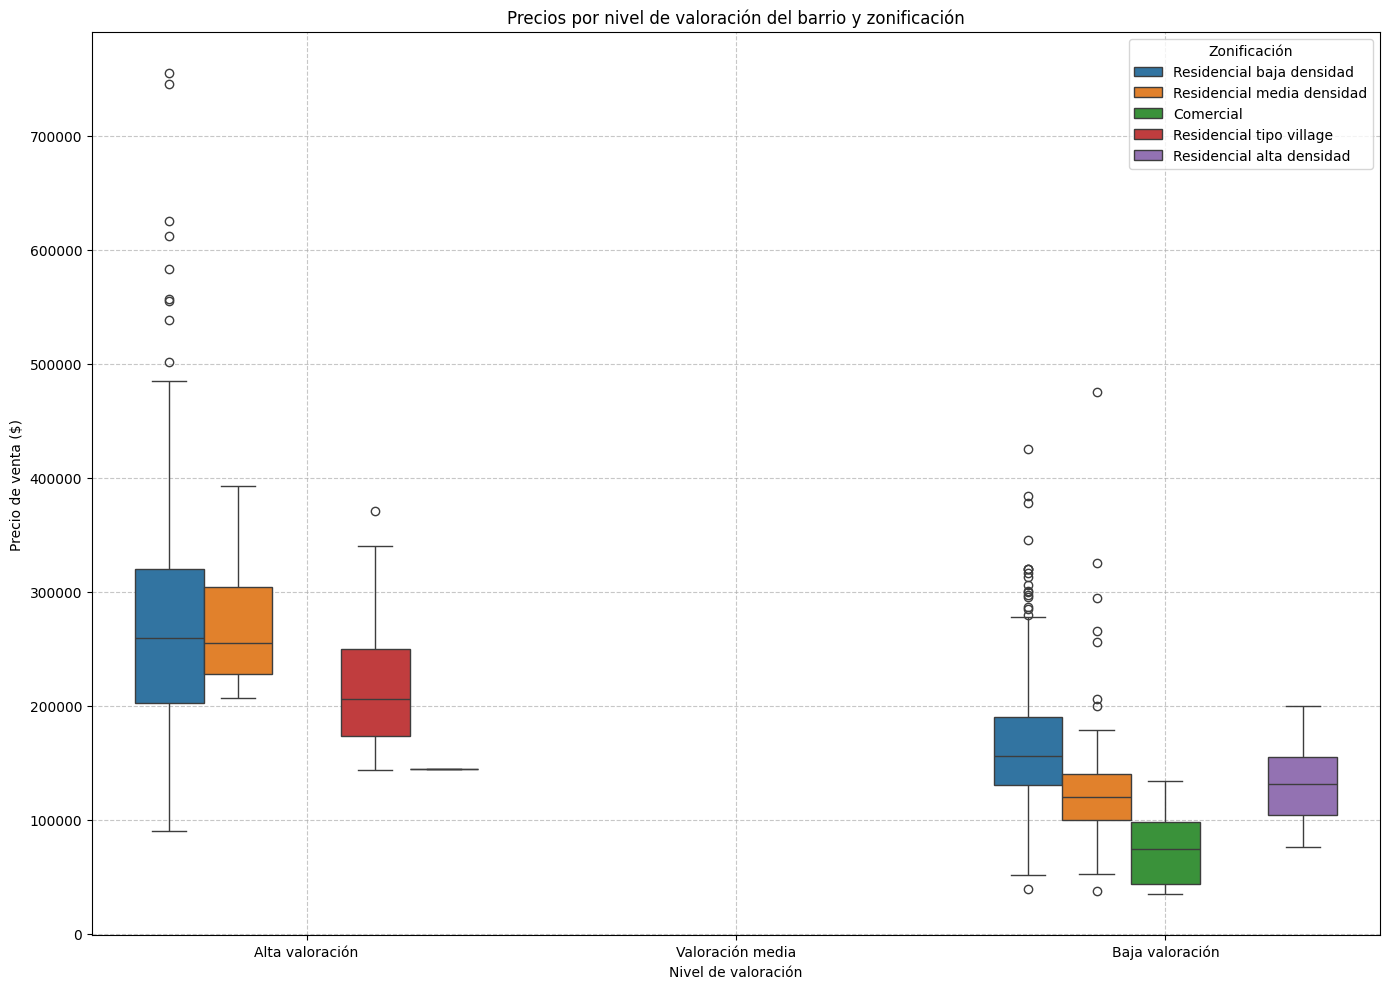

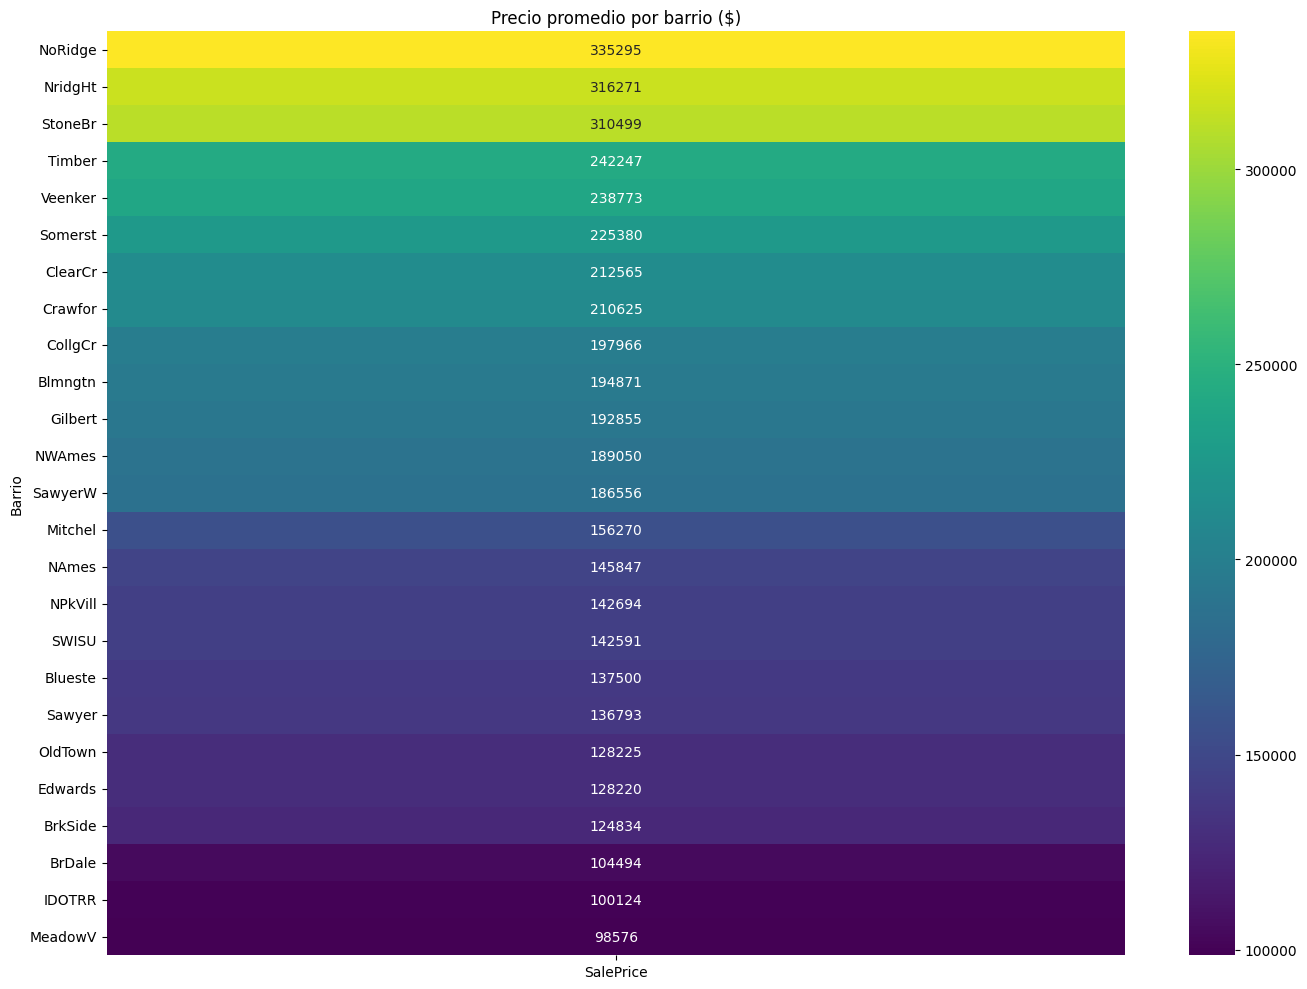

In [5]:
# Calcular el precio promedio por barrio
neighborhood_avg = train_data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

# Definir los barrios de alta, media y baja valoración según percentiles
high_value_threshold = neighborhood_avg.quantile(0.33)
low_value_threshold = neighborhood_avg.quantile(0.67)

# Crear un diccionario para mapear barrios a valoraciones
neighborhood_classification = {}

# Barrios de alta valoración (top 33%)
for neighborhood in neighborhood_avg[neighborhood_avg >= high_value_threshold].index:
   neighborhood_classification[neighborhood] = 'Alta valoración'

# Barrios de valoración media (medio 33%)
for neighborhood in neighborhood_avg[(neighborhood_avg < high_value_threshold) & (neighborhood_avg >= low_value_threshold)].index:
   neighborhood_classification[neighborhood] = 'Valoración media'

# Barrios de valoración baja (bottom 33%)
for neighborhood in neighborhood_avg[neighborhood_avg < low_value_threshold].index:
   neighborhood_classification[neighborhood] = 'Baja valoración'

# Aplicar clasificación por barrio
train_data['NeighborhoodValue'] = train_data['Neighborhood'].map(neighborhood_classification)

# Simplificar zonificación
zoning_map = {
   'RL': 'Residencial baja densidad',
   'RM': 'Residencial media densidad',
   'RH': 'Residencial alta densidad',
   'FV': 'Residencial tipo village',
   'C (all)': 'Comercial',
   'A': 'Agrícola',
   'I': 'Industrial'
}

# Crear una versión simplificada de MSZoning
train_data['ZoningSimple'] = train_data['MSZoning'].map(lambda x: 
   'Comercial' if x.startswith('C') else 
   zoning_map.get(x, 'Otro'))

# Crear grupos combinados (valor de barrio + zonificación)
train_data['LocationGroup'] = train_data['NeighborhoodValue'] + ' - ' + train_data['ZoningSimple']

# Análisis por grupo de ubicación
location_analysis = train_data.groupby(['NeighborhoodValue', 'ZoningSimple'])['SalePrice'].agg(['mean', 'count', 'std']).sort_values(by='mean', ascending=False)

# Mostrar el resultado
print("Análisis por ubicación (valor de barrio + zonificación):")
print(location_analysis)

# Visualización con boxplot de valores por nivel de barrio
plt.figure(figsize=(12, 8))
sns.boxplot(x='NeighborhoodValue', y='SalePrice', data=train_data, order=['Alta valoración', 'Valoración media', 'Baja valoración'])
plt.title('Precios por nivel de valoración del barrio')
plt.xlabel('Nivel de valoración')
plt.ylabel('Precio de venta ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualización de valores por zonificación dentro de cada nivel de barrio
plt.figure(figsize=(14, 10))
sns.boxplot(x='NeighborhoodValue', y='SalePrice', hue='ZoningSimple', data=train_data, 
           order=['Alta valoración', 'Valoración media', 'Baja valoración'])
plt.title('Precios por nivel de valoración del barrio y zonificación')
plt.xlabel('Nivel de valoración')
plt.ylabel('Precio de venta ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Zonificación')
plt.show()

# Mapa de calor que muestra el precio promedio por barrio
plt.figure(figsize=(14, 10))
neighborhood_pivot = pd.pivot_table(
   data=train_data,
   values='SalePrice',
   index='Neighborhood',
   aggfunc='mean'
).sort_values(by='SalePrice', ascending=False)

sns.heatmap(neighborhood_pivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('Precio promedio por barrio ($)')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

## e. Agrupación por características adicionales

Análisis por clase de amenidades:
                       mean  count           std    median
AmenityClass                                              
Premium       249779.796767    433  95665.697490  235000.0
Básica        154767.876670    973  46811.356562  145250.0
Estándar      100021.296296     54  31417.234187   97500.0


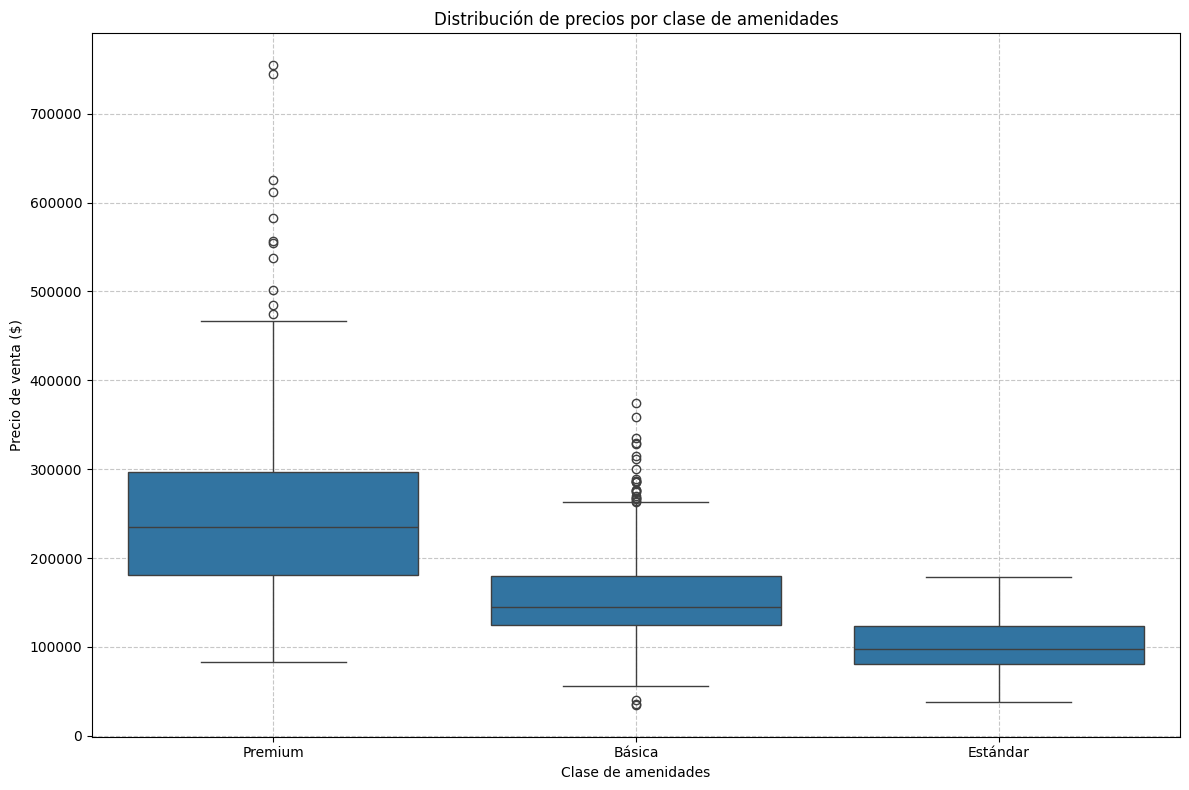


Porcentaje de propiedades con cada tipo de amenidad por clase:
         PoolArea > 0 Fireplaces > 0 WoodDeckSF > 100 GarageCars >= 3
Básica            0.0      35.149024        19.013361        1.952724
Premium      1.616628      97.690531        89.376443       38.568129
Estándar          0.0       9.259259        16.666667             0.0


<Figure size 1400x800 with 0 Axes>

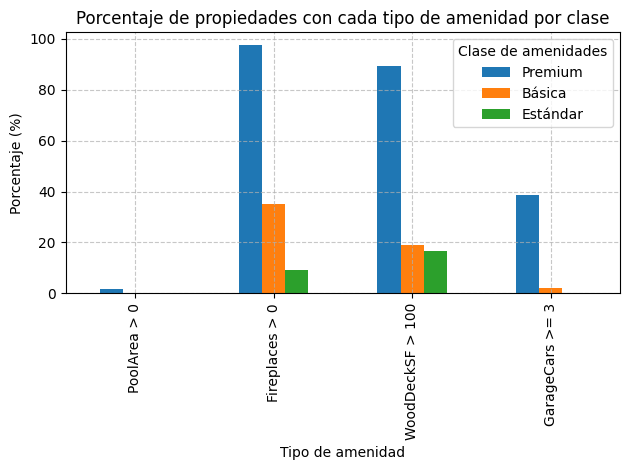

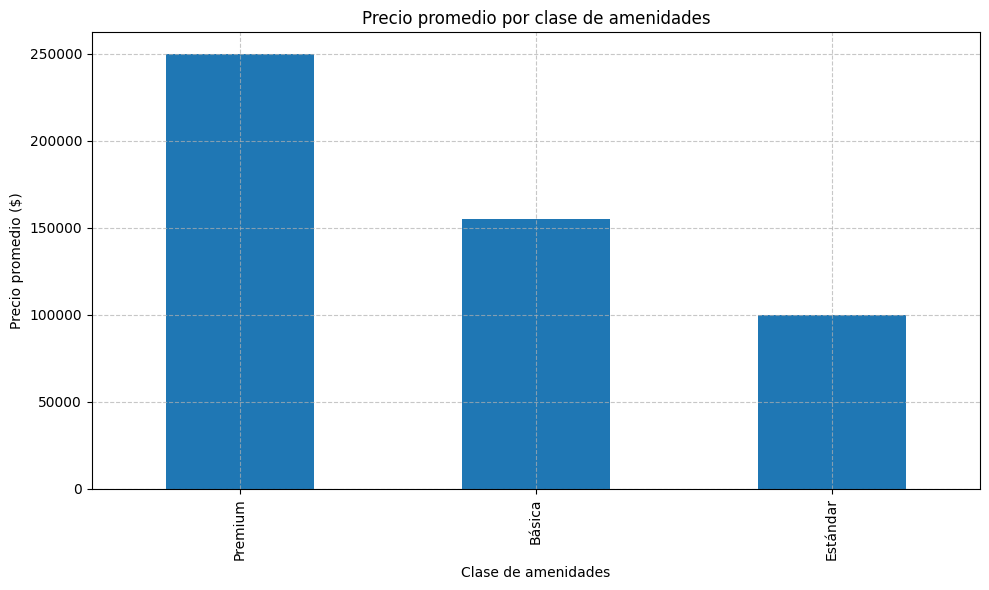

In [6]:
# Función para clasificar propiedades según sus amenidades
def classify_amenities(row):
   # Verificar amenidades premium
   has_pool = row['PoolArea'] > 0
   has_fireplace = row['Fireplaces'] > 0
   has_deck = row['WoodDeckSF'] > 100  # Deck grande
   has_porch = (row['OpenPorchSF'] + row['EnclosedPorch'] + row['3SsnPorch'] + row['ScreenPorch']) > 100
   
   # Verificar garaje
   has_garage = pd.notna(row['GarageType']) and row['GarageType'] != 'NA' and row['GarageCars'] > 0
   has_large_garage = pd.notna(row['GarageType']) and row['GarageType'] != 'NA' and row['GarageCars'] >= 3
   
   # Contar amenidades premium
   premium_count = sum([has_pool, has_fireplace, has_deck, has_large_garage])
   
   # Clasificar
   if premium_count >= 2:
       return 'Premium'
   elif (has_garage or has_porch) and premium_count <= 1:
       return 'Básica'
   else:
       return 'Estándar'

# Aplicar la clasificación
train_data['AmenityClass'] = train_data.apply(classify_amenities, axis=1)

# Análisis por clase de amenidades
amenity_analysis = train_data.groupby('AmenityClass')['SalePrice'].agg(['mean', 'count', 'std', 'median']).sort_values(by='mean', ascending=False)

# Mostrar el resultado
print("Análisis por clase de amenidades:")
print(amenity_analysis)

# Visualización con boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='AmenityClass', y='SalePrice', data=train_data, order=['Premium', 'Básica', 'Estándar'])
plt.title('Distribución de precios por clase de amenidades')
plt.xlabel('Clase de amenidades')
plt.ylabel('Precio de venta ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Crear una tabla que muestre el porcentaje de cada tipo de amenidad en cada clase
amenities = ['PoolArea > 0', 'Fireplaces > 0', 'WoodDeckSF > 100', 'GarageCars >= 3']
amenity_percentages = pd.DataFrame(index=train_data['AmenityClass'].unique(), columns=amenities)

for amenity_class in train_data['AmenityClass'].unique():
   class_data = train_data[train_data['AmenityClass'] == amenity_class]
   
   amenity_percentages.loc[amenity_class, 'PoolArea > 0'] = (class_data['PoolArea'] > 0).mean() * 100
   amenity_percentages.loc[amenity_class, 'Fireplaces > 0'] = (class_data['Fireplaces'] > 0).mean() * 100
   amenity_percentages.loc[amenity_class, 'WoodDeckSF > 100'] = (class_data['WoodDeckSF'] > 100).mean() * 100
   amenity_percentages.loc[amenity_class, 'GarageCars >= 3'] = (class_data['GarageCars'] >= 3).mean() * 100

print("\nPorcentaje de propiedades con cada tipo de amenidad por clase:")
print(amenity_percentages.round(1))

# Gráfico de barras para visualizar la distribución de amenidades
plt.figure(figsize=(14, 8))
amenity_percentages = amenity_percentages.reindex(['Premium', 'Básica', 'Estándar'])
amenity_percentages.T.plot(kind='bar')
plt.title('Porcentaje de propiedades con cada tipo de amenidad por clase')
plt.xlabel('Tipo de amenidad')
plt.ylabel('Porcentaje (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Clase de amenidades')
plt.tight_layout()
plt.show()

# Precio promedio por clase de amenidades
plt.figure(figsize=(10, 6))
amenity_means = train_data.groupby('AmenityClass')['SalePrice'].mean().reindex(['Premium', 'Básica', 'Estándar'])
amenity_means.plot(kind='bar')
plt.title('Precio promedio por clase de amenidades')
plt.xlabel('Clase de amenidades')
plt.ylabel('Precio promedio ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()